<a href="https://colab.research.google.com/github/Tirtayuda12/Machine_Learning-Telu/blob/main/Week%208/Google%20Colab/Tugas_Lecture_8_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Tirtayuda Munggarana

NIM : 1103202108

Kelas : TK-44-G04

Tugas 8 SVM pada dataset heart_failure_clinical_records_dataset.csv

# Import Library

In [1]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
# Menonaktifkan semua peringatan
warnings.filterwarnings("ignore")

# Gdrive Ke GColab

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Menampilkan Data

In [ ]:
#Membaca file CSV yang berisi data ke dalam sebuah DataFrame
data = pd.read_csv('/content/gdrive/MyDrive/DATASET/heart_failure_clinical_records_dataset.csv')

# Tampilkan 5 baris pertama dataset
print("\n5 Baris Pertama Dataset:")
data.head()


5 Baris Pertama Dataset:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Mencari Info pada Data

In [ ]:
# Tampilkan informasi dataset
print("Informasi Dataset:")
print(data.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB

In [ ]:
# Statistik deskriptif
print("\nStatistik Deskriptif Dataset:")
data.describe()


Statistik Deskriptif Dataset:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Visualisasi

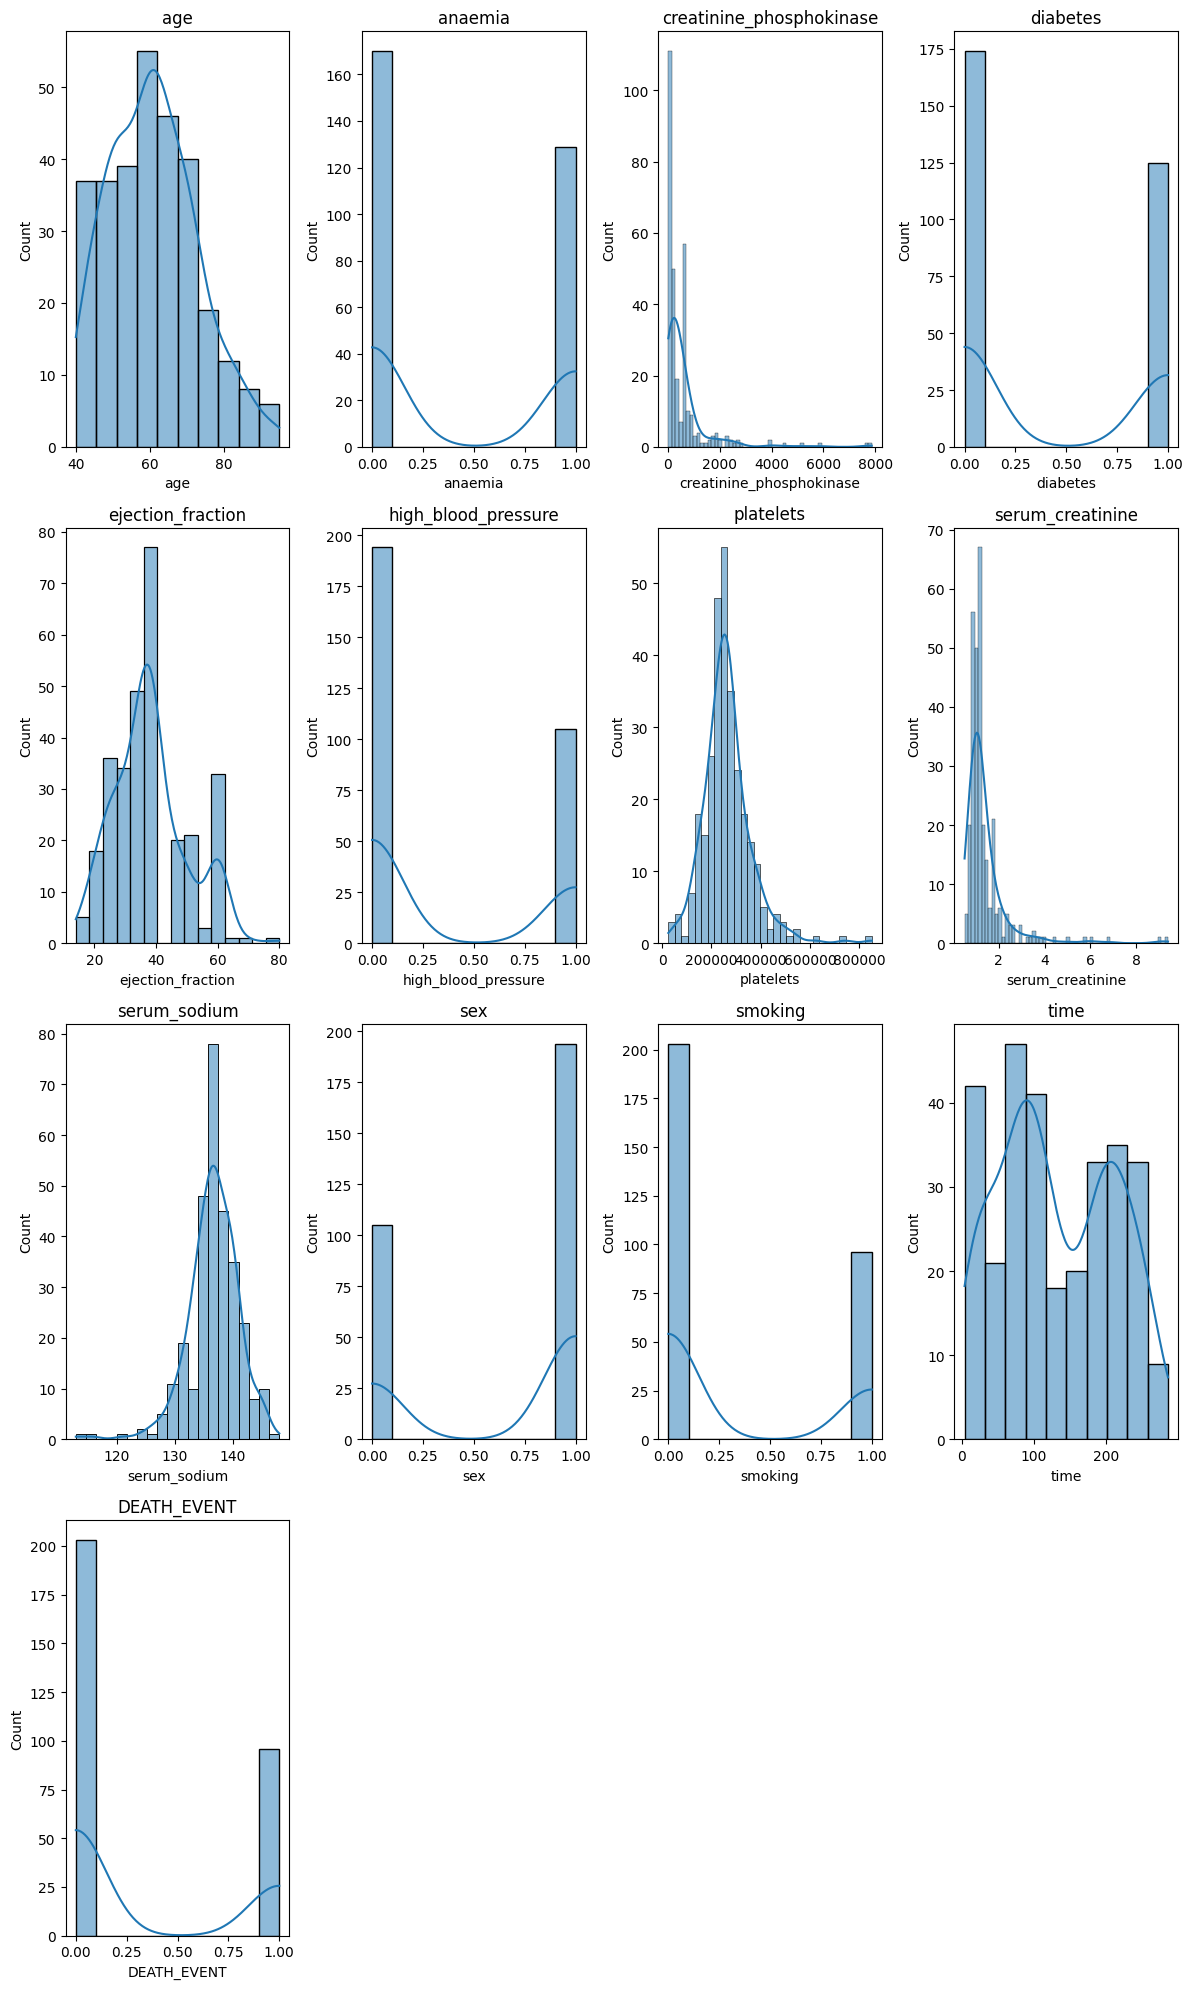

In [ ]:
# Calculate the number of rows and columns for subplot arrangement
num_cols = data.shape[1]
num_rows = (num_cols - 1) // 4 + 1

# Visualisasi distribusi setiap kolom
plt.figure(figsize=(12, 5*num_rows))
for i, column in enumerate(data.columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

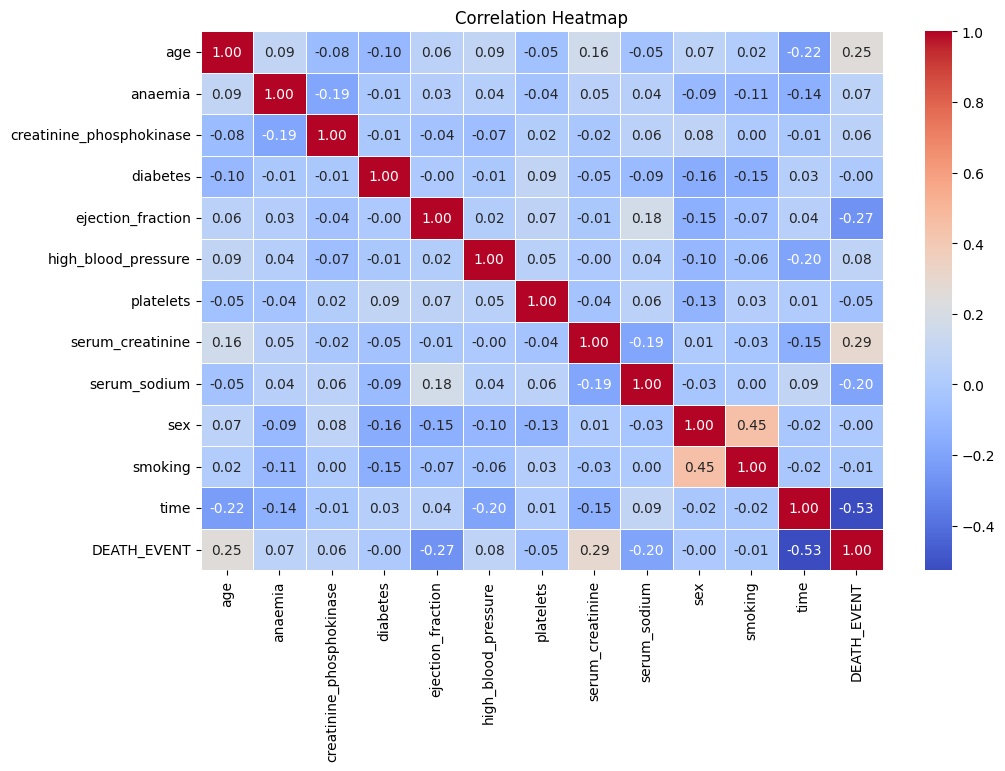

In [ ]:
# Hitung korelasi antar fitur
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(11, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Laporan Evaluasi

In [ ]:
# Persiapan data untuk pemodelan
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat dan melatih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Melakukan prediksi
y_pred = svm_model.predict(X_test)

In [ ]:
# Menampilkan confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[32  3]
 [12 13]]


In [ ]:
# Menampilkan laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        35
           1       0.81      0.52      0.63        25

    accuracy                           0.75        60
   macro avg       0.77      0.72      0.72        60
weighted avg       0.76      0.75      0.74        60



In [ ]:
# Hitung dan tampilkan accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


Hasilnya menunjukkan bahwa model dapat membuat prediksi yang benar sekitar 75% dari seluruh prediksi yang dilakukan. Akurasi yang lebih tinggi menunjukkan kinerja model yang lebih baik dalam melakukan prediksi. Namun, akurasi sendiri tidak memberikan gambaran lengkap tentang kinerja model, terutama jika terdapat ketidakseimbangan kelas dalam dataset. Oleh karena itu, selalu disarankan untuk memeriksa metrik evaluasi lainnya juga, seperti presisi, recall, dan F1-score.